In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [5]:
tabla_cruzada = pd.crosstab(df['category'], df['isBestSeller'])

tabla_cruzada['proporcion_best_seller'] = tabla_cruzada[True] / (tabla_cruzada[False] + tabla_cruzada[True])

tabla_cruzada_ordenada = tabla_cruzada.sort_values('proporcion_best_seller', ascending=False)
print(tabla_cruzada_ordenada)


isBestSeller                    False  True  proporcion_best_seller
category                                                           
Grocery                          9008   556                0.058135
Smart Home Security & Lighting     98     6                0.057692
Health & Personal Care           9017   552                0.057686
Mobile Phone Accessories          248    11                0.042471
Power & Hand Tools               8353   306                0.035339
...                               ...   ...                     ...
Bedding Collections              6309     0                0.000000
CPUs                              249     0                0.000000
CD, Disc & Tape Players          8798     0                0.000000
Blank Media Cases & Wallets       243     0                0.000000
eBook Readers & Accessories       246     0                0.000000

[296 rows x 3 columns]


In [6]:
%pip install scipy

from scipy.stats import chi2_contingency





Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Propietario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))

print(chi2)
print(p)
print(dof)

36540.20270061387
0.0
295


In [8]:
n = len(df) 
v_cramer = np.sqrt(chi2 / (n * (min(len(tabla_cruzada.index), len(tabla_cruzada.columns)) - 1)))
print(v_cramer)


0.08646709890892415


<Axes: xlabel='category'>

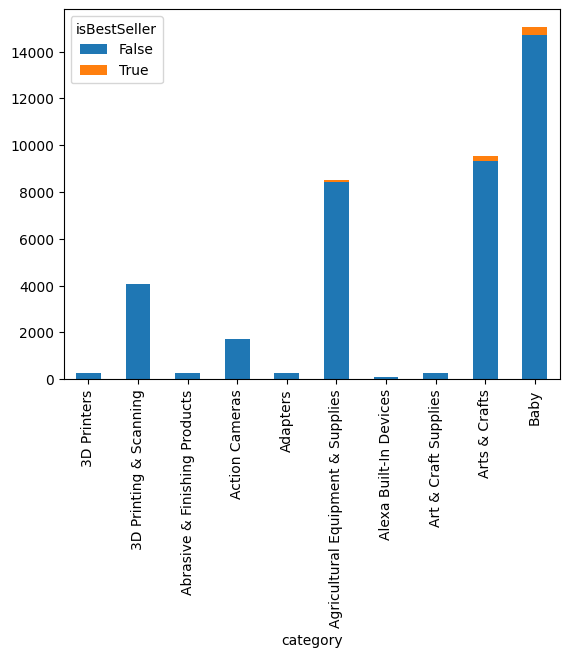

In [9]:
tabla_cruzada_grafico = pd.crosstab(df['category'], df['isBestSeller'])
tabla_cruzada_grafico =tabla_cruzada_grafico.head(10)
tabla_cruzada_grafico.plot(kind='bar', stacked=True)


In [10]:
Q1 = np.percentile(df['price'], 25)  
Q3 = np.percentile(df['price'], 75)  
IQR = Q3 - Q1  


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Datos después de eliminar valores atípicos: {len(df_filtered)} filas")


Datos después de eliminar valores atípicos: 2115963 filas


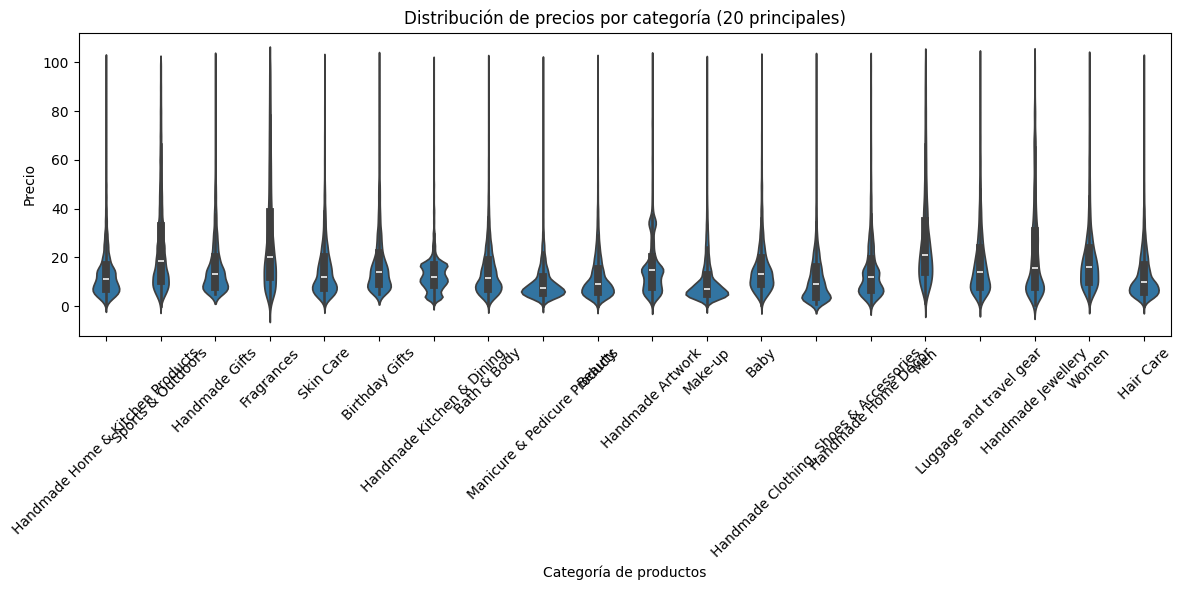

In [11]:
top_categories = df_filtered['category'].value_counts().head(20).index
df_top_categories = df_filtered[df_filtered['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_categories, x='category', y='price')
plt.title('Distribución de precios por categoría (20 principales)')
plt.xlabel('Categoría de productos')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
precio_promedio_por_categoria = df.groupby('category')['price'].mean()
categoria_mas_cara = precio_promedio_por_categoria.idxmax()
print(f"La categoría con el precio medio más alto es: {categoria_mas_cara}")


La categoría con el precio medio más alto es: Laptops


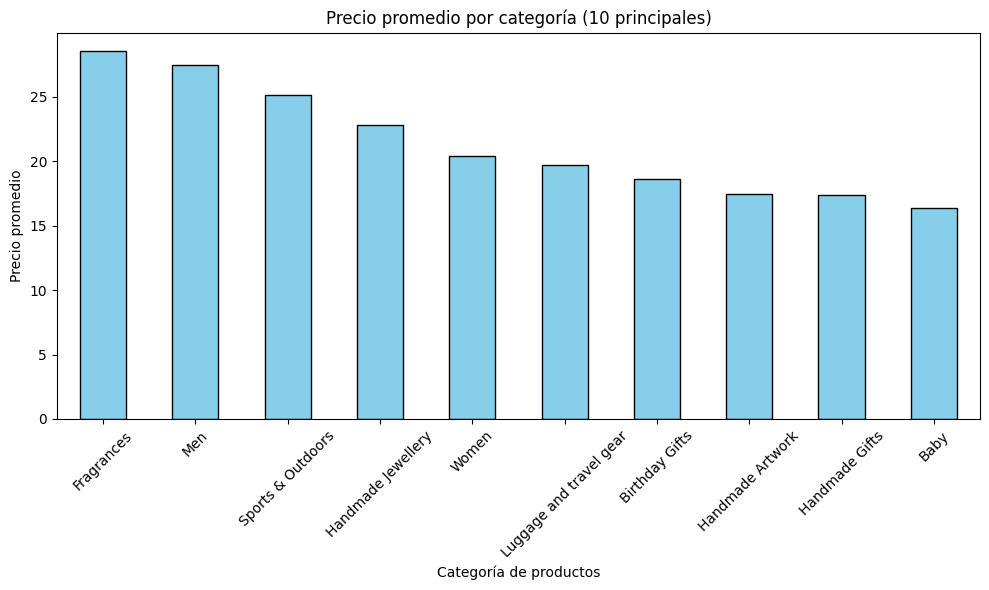

In [13]:
avg_price_top_10 = df_top_categories.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_price_top_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Precio promedio por categoría (10 principales)')
plt.xlabel('Categoría de productos')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Propietario\AppData\Local\Temp\ipykernel_4680\4055778080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_ratings, x='category', y='stars', palette='Set3')


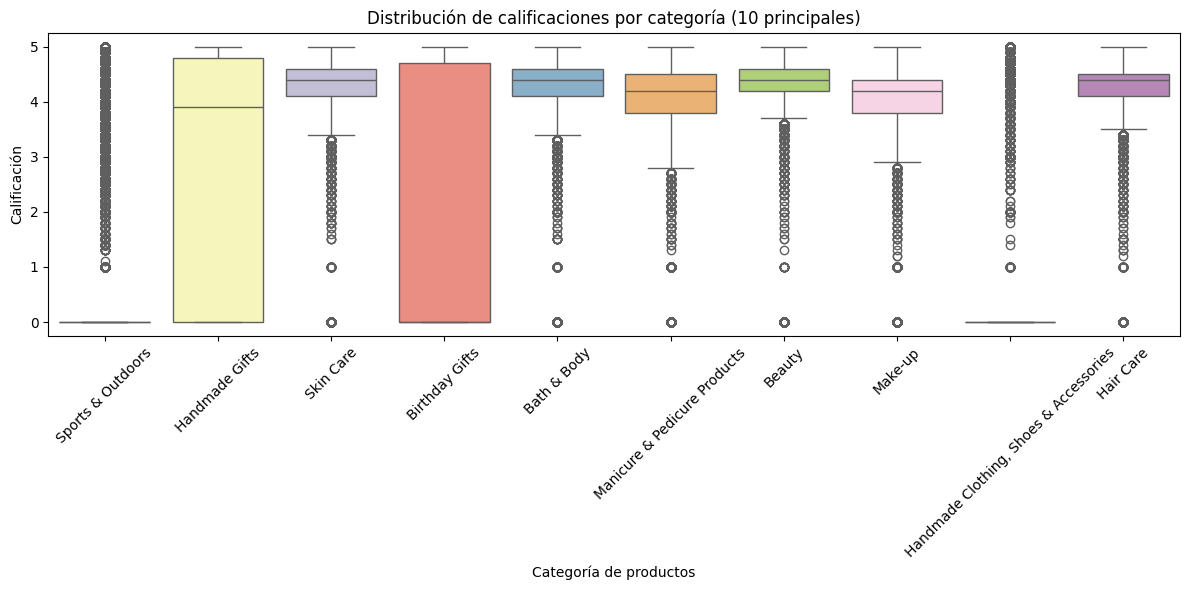

In [14]:
top_categories_ratings = df_filtered['category'].value_counts().head(10).index
df_top_ratings = df_filtered[df_filtered['category'].isin(top_categories_ratings)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_ratings, x='category', y='stars', palette='Set3')
plt.title('Distribución de calificaciones por categoría (10 principales)')
plt.xlabel('Categoría de productos')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
calificacion_promedio_por_categoria = df.groupby('category')['stars'].mean()
categoria_mejor_calificada = calificacion_promedio_por_categoria.idxmax()
print(f"La categoría con la calificación media más alta es: {categoria_mejor_calificada}")


La categoría con la calificación media más alta es: Luxury Food & Drink


In [16]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [18]:
correlacion = df[['price', 'stars']].corr(method='pearson')
print(correlacion)

          price     stars
price  1.000000 -0.124907
stars -0.124907  1.000000


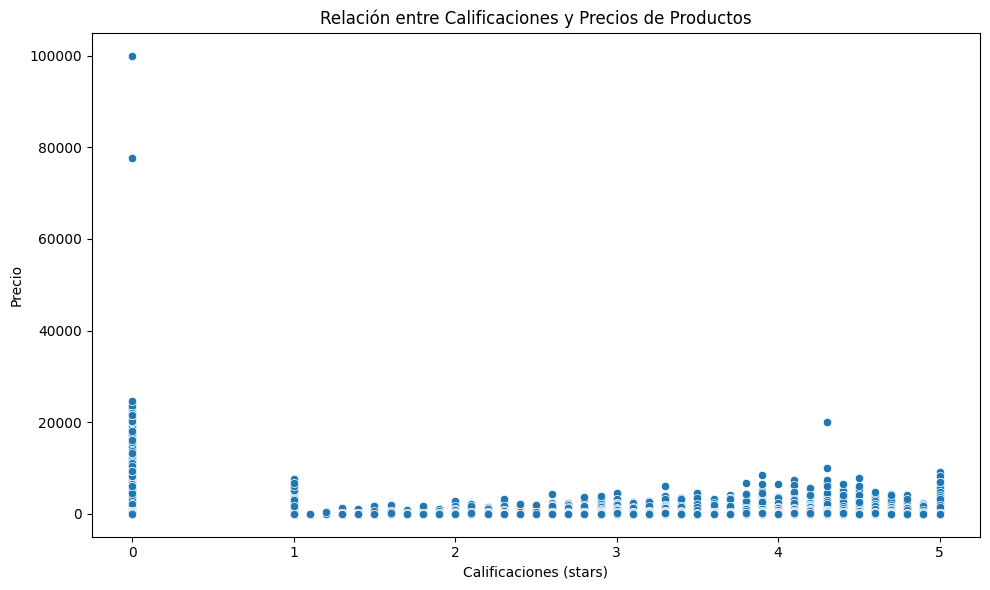

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price')
plt.title('Relación entre Calificaciones y Precios de Productos')
plt.xlabel('Calificaciones (stars)')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

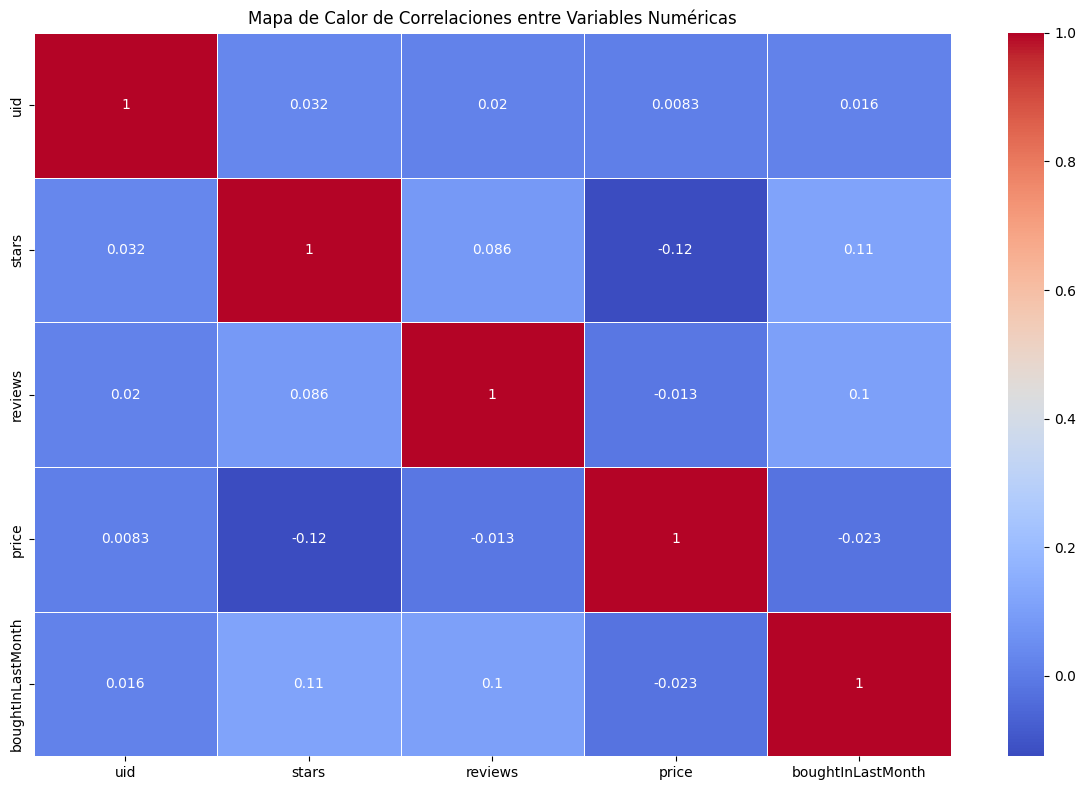

In [21]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

In [23]:
import scipy.stats as stats

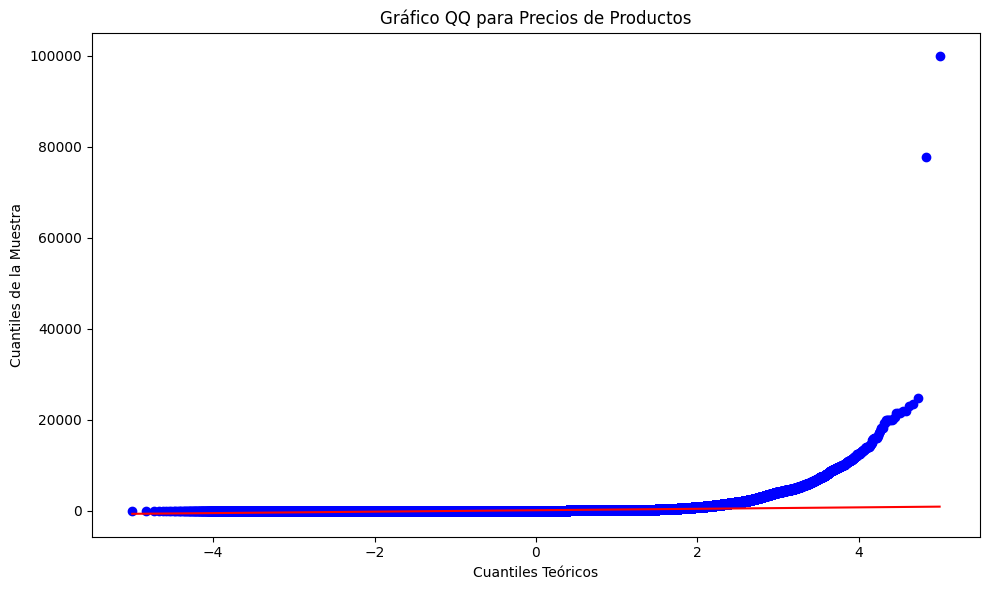

In [24]:
plt.figure(figsize=(10, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Gráfico QQ para Precios de Productos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.tight_layout()
plt.show()